In [1]:
!python --version

Python 3.8.0


# Package to install
!pip install rasterio
!pip install rioxarray
!pip install geopandas
!pip install earthpy

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import rasterio
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from matplotlib.colors import ListedColormap

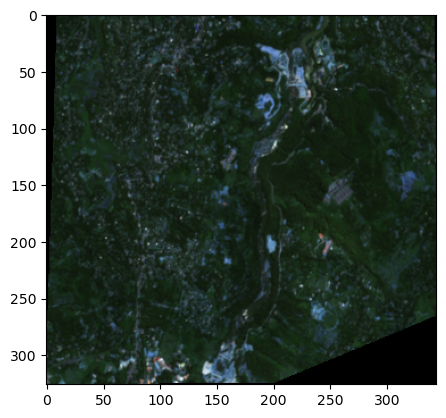

In [13]:
# Show true color img
img = cv2.imread('./Data/Test1/2022-08-15-00_00_2022-08-15-23_59_Sentinel-2_L2A_True_color.tiff')
plt.imshow(img)
plt.show()

In [14]:
red_file = rxr.open_rasterio('./Data/Test1/2022-08-15-00_00_2022-08-15-23_59_Sentinel-2_L2A_B04_(Raw).tiff')
nir_file = rxr.open_rasterio('./Data/Test1/2022-08-15-00_00_2022-08-15-23_59_Sentinel-2_L2A_B08_(Raw).tiff')
print(red_file.shape)
print(nir_file.shape)

(1, 326, 344)
(1, 326, 344)


In [15]:
ndvi = es.normalized_diff(nir_file[0], red_file[0])

In [16]:
ndvi

masked_array(
  data=[[--, --, --, ..., 0.8852459016393442, --, --],
        [--, --, --, ..., 0.8962962962962963, --, --],
        [--, --, --, ..., 0.9097744360902256, --, --],
        ...,
        [0.047619047619047616, 0.11578947368421053, 0.2857142857142857,
         ..., --, --, --],
        [0.12195121951219512, 0.12087912087912088, 0.17391304347826086,
         ..., --, --, --],
        [0.3617021276595745, 0.24731182795698925, 0.3404255319148936,
         ..., --, --, --]],
  mask=[[ True,  True,  True, ..., False,  True,  True],
        [ True,  True,  True, ..., False,  True,  True],
        [ True,  True,  True, ..., False,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=1e+20)

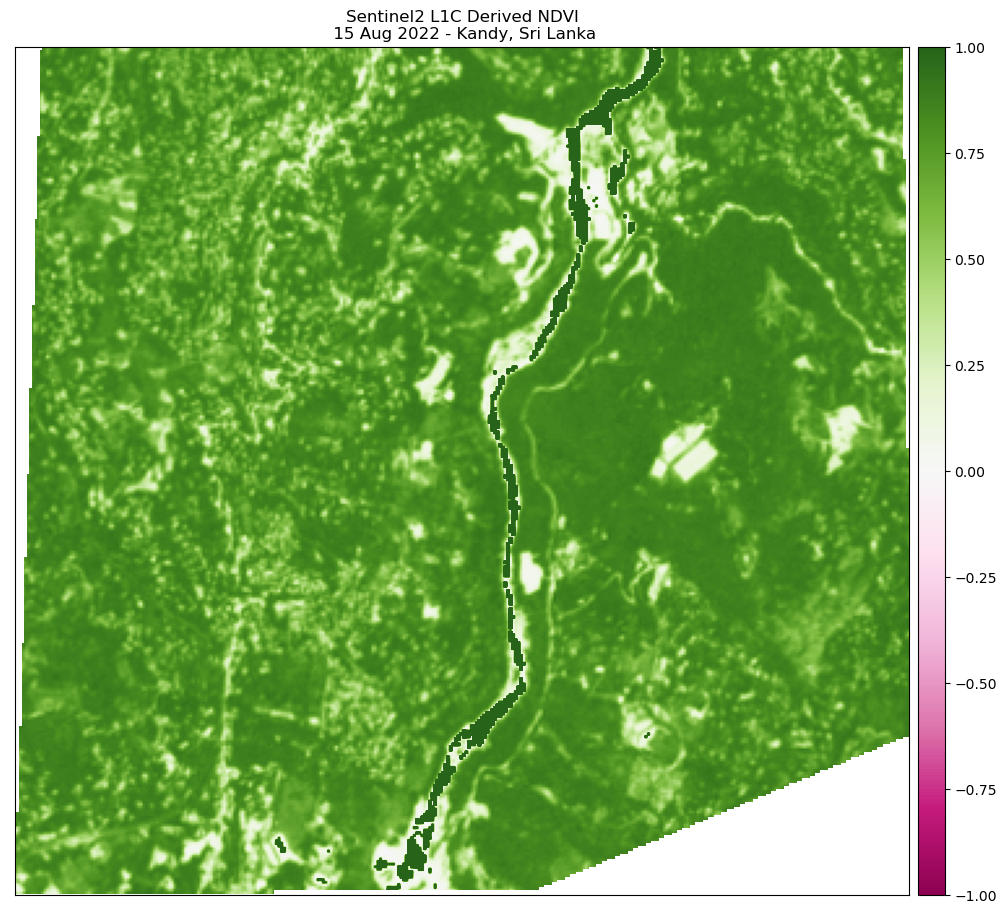

In [17]:
ep.plot_bands(ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Sentinel2 L1C Derived NDVI\n 15 Aug 2022 - Kandy, Sri Lanka")
plt.show()

## Veg classification plot

In [6]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[2, 3, 4, 5, --],
             mask=[False, False, False, False,  True],
       fill_value=999999,
            dtype=int64)

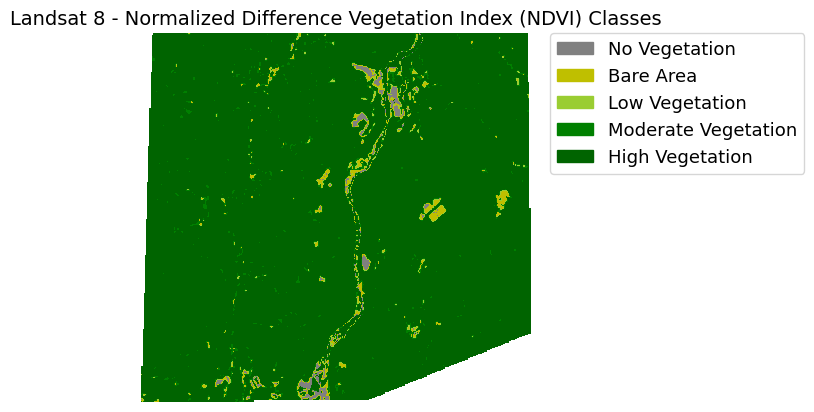

In [7]:
# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots()
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

#Counting the Number of pixels

## Vegetation plot with one thresh

In [8]:
ndvi_class_bins = [-np.inf, 0.6, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)
print(np.unique(ndvi_landsat_class))

[1 2 3]


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## Vegetation plot with threshold range

In [7]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0.6, 0.8, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)
print(np.unique(ndvi_landsat_class))


[1 2 3 4]


In [24]:
#x = ndvi_landsat_class.copy()
ndvi_landsat_class[ndvi_landsat_class == 3] = np.unique(ndvi_landsat_class)[0]
np.unique(ndvi_landsat_class)

array([1, 2, 4], dtype=int64)

# Apply the nodata mask to the newly classified NDVI data
x = np.ma.masked_where(
    np.ma.getmask(ndvi), x
)
np.unique(x)

In [25]:

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[1, 2, --],
             mask=[False, False,  True],
       fill_value=999999,
            dtype=int64)

In [26]:
ndvi_landsat_class

masked_array(
  data=[[--, --, --, ..., 1, --, --],
        [--, --, --, ..., 1, --, --],
        [--, --, --, ..., 1, --, --],
        ...,
        [1, 1, 1, ..., --, --, --],
        [1, 1, 1, ..., --, --, --],
        [1, 1, 1, ..., --, --, --]],
  mask=[[ True,  True,  True, ..., False,  True,  True],
        [ True,  True,  True, ..., False,  True,  True],
        [ True,  True,  True, ..., False,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=999999,
  dtype=int64)

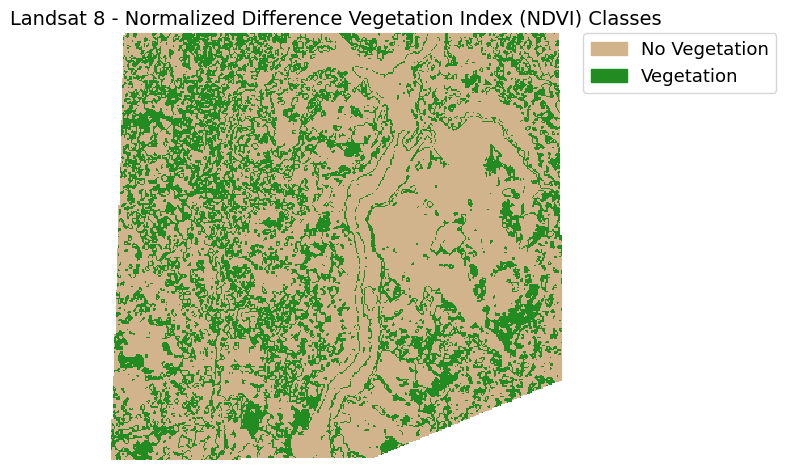

In [27]:
# Define color map
nbr_colors = ["tan", "forestgreen"]#, "burlywood"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:2]

# Plot your data
fig, ax = plt.subplots()
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

## Plot for vegetation range

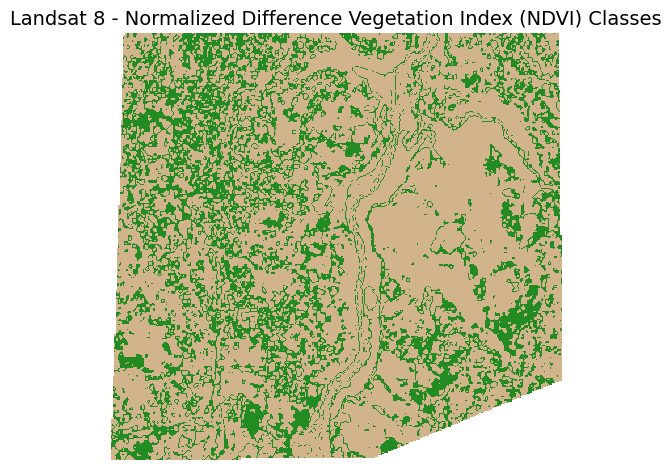

In [11]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0.6, 0.8, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

# Define color map
nbr_colors = ["tan", "forestgreen", "tan"] #"burlywood"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Vegetation",
    "No Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:3]

# Plot your data
fig, ax = plt.subplots()
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

#ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

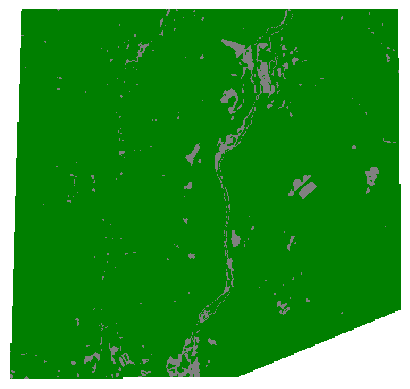

In [10]:
#from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
#from matplotlib.figure import Figure

fig, ax = plt.subplots()
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
ax.set_axis_off()
canvas = plt.gca().figure.canvas
canvas.draw()
data = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
image = data.reshape(canvas.get_width_height()[::-1] + (3,))

In [14]:

img_PIL = Image.open('./Data/Test1/image.png')
img_PIL.show()

In [ ]:
img_PIL.save('./Data/Test1/')

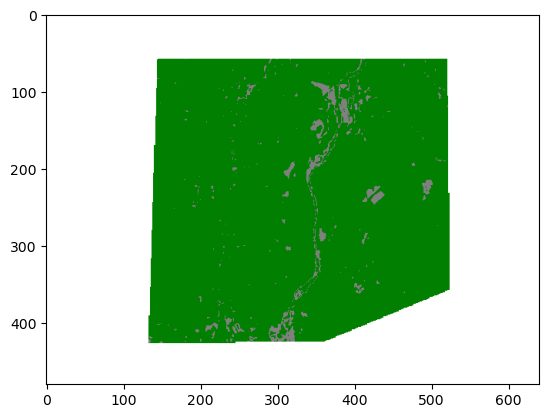

In [12]:
plt.imshow(image)
plt.show()

In [27]:
# convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

# create mask for green color in hsv
lower = (50,100,100)
upper = (70,255,255)
mask = cv2.inRange(hsv, lower, upper)

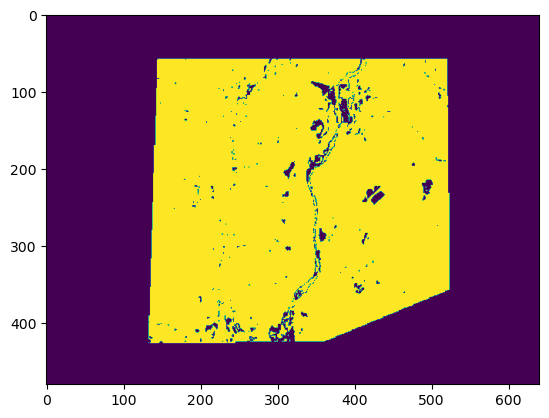

In [28]:
plt.imshow(mask)

In [29]:
# count non-zero pixels in mask
count=np.count_nonzero(mask)
print('count:', count)

count: 130972


In [30]:
# counting the number of pixels
number_of_white_pix = np.sum(mask == 255)
number_of_black_pix = np.sum(mask == 0)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 130972
Number of black pixels: 176228


In [2]:
img_path = r'C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Sentinel-hub API\Data\c63cc1c7352bd86d218dbe557a56aa21'
file = 'response.tiff'
file = rxr.open_rasterio(img_path+'/'+file)

In [3]:
print(file.shape)

(4, 2476, 1453)


In [5]:
ndvi = es.normalized_diff(file[3], file[2])
ndvi.shape

(2476, 1453)

## Text on Plot

In [18]:
# Define color map
nbr_colors = ["tan", "forestgreen"]#, "burlywood"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:2]

In [19]:
green_cover = 45.5
CO2_amount = 47.4578
trees = 625

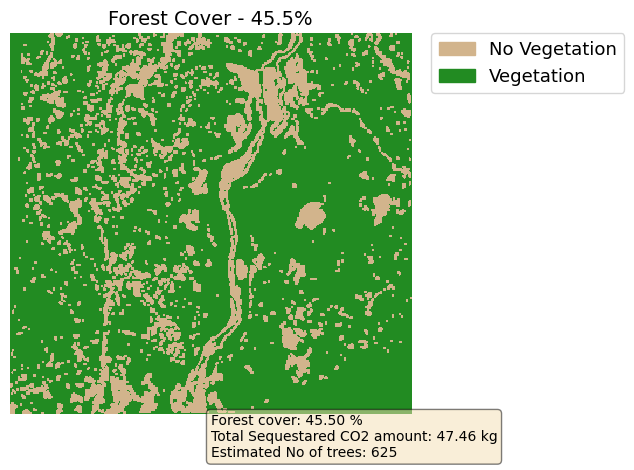

In [35]:
# Plot your data
fig, ax = plt.subplots()
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
textstr = '\n'.join((
    r'Forest cover: %.2f %%' % (green_cover, ),
    r'Total Sequestared CO2 amount: %.2f kg' % (CO2_amount, ),
    r'Estimated No of trees: %.0f' % (trees, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.50, 0.00, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Forest Cover - "+ str(green_cover)+"%",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()